In [30]:
pip install pandas numpy matplotlib seaborn scikit-learn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
### Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pickle
import os

In [12]:
### Step 2: Load the Dataset and Data Cleaning
# Load the dataset
df = pd.read_csv('Depression_data.csv')

In [13]:
df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [14]:
# View the first few rows
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [15]:
# Check for missing values
print(df.isnull().sum())

Index                        0
message to examine           0
label (depression result)    0
dtype: int64


In [34]:
# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

In [16]:
# Handle outliers (example using Z-score)
from scipy import stats
df = df[(np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]

In [17]:
# Save cleaned data
df.to_csv('cleaned_depression_data.csv', index=False)

In [20]:

# Load cleaned data
df = pd.read_csv('cleaned_depression_data.csv')


In [22]:
print(df.columns)

Index(['Index', 'message to examine', 'label (depression result)'], dtype='object')


/var/folders/0d/9jh51wpj611_fvy1nnrgc4xw0000gn/T/ipykernel_48482/3000390173.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


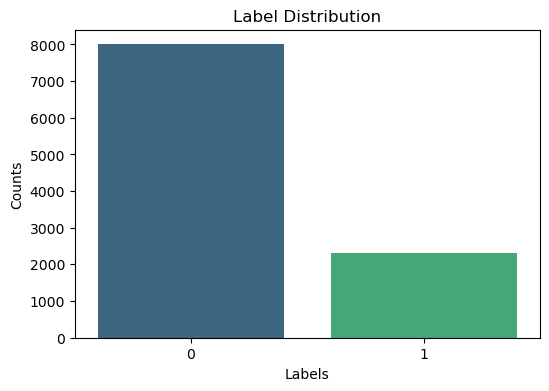

In [ ]:
#Label distribution
label_counts = df['label (depression result)'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.show()

In [31]:
from wordcloud import WordCloud

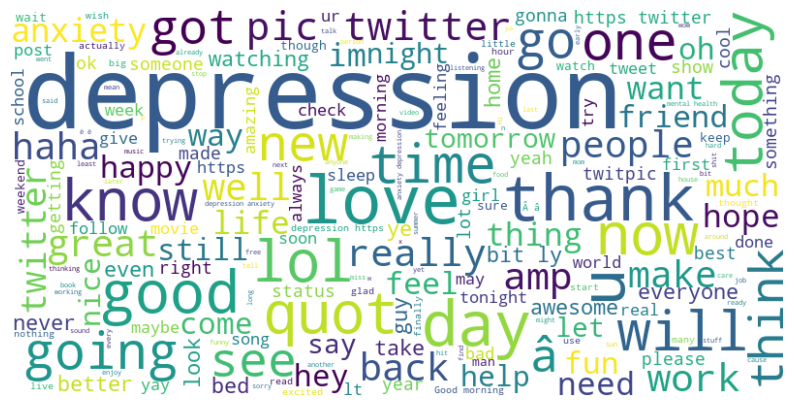

In [36]:
# Word Cloud
all_text = ' '.join(df['message to examine'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['message to examine']).toarray()
y = df['label (depression result)']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, lr_preds))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, rf_preds))

# SVM
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)
print("SVM:\n", classification_report(y_test, svc_preds))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1614
           1       1.00      0.94      0.97       449

    accuracy                           0.99      2063
   macro avg       0.99      0.97      0.98      2063
weighted avg       0.99      0.99      0.99      2063

Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1614
           1       1.00      0.98      0.99       449

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063

SVM:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1614
           1       1.00      0.98      0.99       449

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters for SVM:\n", grid_search.best_params_)


Best Parameters for SVM:
 {'C': 10, 'kernel': 'linear'}


In [40]:
# Create a new SVM model with the best parameters
best_svc_model = SVC(C=10, kernel='linear')

# Fit the model on the training data
best_svc_model.fit(X_train, y_train)

# Make predictions on the test set
best_svc_preds = best_svc_model.predict(X_test)

# Evaluate the model
print("SVM with Best Hyperparameters:\n", classification_report(y_test, best_svc_preds))

SVM with Best Hyperparameters:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1614
           1       1.00      0.98      0.99       449

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063



In [41]:
# Save the model using pickle
with open('best_svc_model.pkl', 'wb') as file:
    pickle.dump(best_svc_model, file)

# Save the vectorizer as well
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [43]:
# Load the model
with open('best_svc_model.pkl', 'rb') as file:
    loaded_svc_model = pickle.load(file)

# Load the vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_vectorizer = pickle.load(file)

# Example of making predictions with the loaded model
new_data = ["I feel really down today.", "I'm having a great day!"]
new_data_vectorized = loaded_vectorizer.transform(new_data)

# Convert sparse matrix to dense array
new_data_vectorized_dense = new_data_vectorized.toarray()

# Make predictions
predictions = loaded_svc_model.predict(new_data_vectorized_dense)

print("Predictions for new data:", predictions)

Predictions for new data: [0 0]


In [45]:
import streamlit as st
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the pre-trained model and vectorizer
with open('best_svc_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Streamlit app title
st.title("Depression Prediction App")

# User input for text
user_input = st.text_area("Enter your sentence or words:")

# Prediction button
if st.button("Predict"):
    # Transform the input using the loaded vectorizer
    input_vectorized = vectorizer.transform([user_input]).toarray()
    
    # Make prediction
    prediction = model.predict(input_vectorized)
    
    # Display the result
    if prediction[0] == 1:
        st.success("The model predicts: You may be experiencing depression.")
    else:
        st.success("The model predicts: You are not experiencing depression.")

2024-12-11 13:03:31.282 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-12-11 13:03:31.293 Session state does not function when running a script without `streamlit run`
